In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def wishart(n, p):
    A = np.random.randn(n, p)
    return A @ A.T / p

def wishart_gen(n, nu):
    A = np.triu(np.random.randn(n,n))
    for i in range(n):
        A[i,i] = gamma.rvs((n+nu-i+1)/2, loc=0, scale=1/2, size=1)[0]
    return A.T @ A / (n+nu)

def gamma_diag(n, nu):
    a = nu
    b = 1
    return gamma.rvs(a, loc=0, scale=1/b, size=n)

In [62]:
eigs_wish = np.linalg.eigvals(wishart(1000, 6000))
eigs_gam = np.sort(gamma_diag(100000, 1 / 6+1))

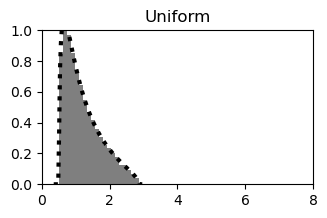

In [122]:
plt.figure(figsize=(3.5,2))
plt.hist(1/eigs_wish,bins=20,density=True,color='tab:gray')
plt.xlim([0,8])
plt.ylim([0,1])
mp = marchenko_pastur_gen(6)
x = np.linspace(mp.a,1.5*mp.b,100)
plt.plot(x, x**(-2)*mp.pdf(1/x),'k:',linewidth=3)
plt.title('Uniform')
plt.savefig('figures/eigenvector_uniform.png',dpi=200,bbox_inches='tight')

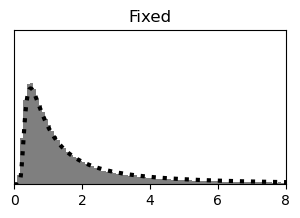

In [121]:
plt.figure(figsize=(3.5,2))
t = 1/eigs_gam
plt.hist(t[t<1000],bins=10000, density=True,color='tab:gray')
plt.xlim([0,8])
plt.ylim([0,1])
x = np.linspace(0.01,10,1000)
plt.plot(x, (x**(-2))*htmp.pdf(1/x, 3, 2),'k:',linewidth=3)
plt.title('Fixed')
plt.gca().get_yaxis().set_visible(False)
plt.savefig('figures/eigenvector_fixed.png',dpi=200,bbox_inches='tight')

/tmp/ipykernel_31946/2356779779.py:9: RuntimeWarning: divide by zero encountered in power
  f1 = x**(-2)*htmp.pdf(1/x, gam, c)
/tmp/ipykernel_31946/2356779779.py:9: RuntimeWarning: divide by zero encountered in divide
  f1 = x**(-2)*htmp.pdf(1/x, gam, c)
/tmp/ipykernel_31946/2356779779.py:11: RuntimeWarning: divide by zero encountered in power
  f2 = x**(-2)*marchenko_pastur.pdf(1/x)
/tmp/ipykernel_31946/2356779779.py:11: RuntimeWarning: divide by zero encountered in divide
  f2 = x**(-2)*marchenko_pastur.pdf(1/x)
/tmp/ipykernel_31946/2356779779.py:11: RuntimeWarning: invalid value encountered in multiply
  f2 = x**(-2)*marchenko_pastur.pdf(1/x)


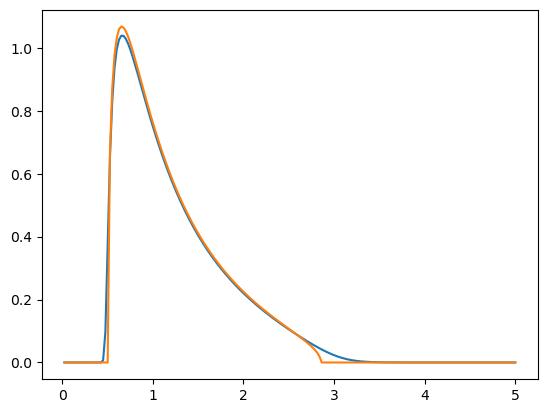

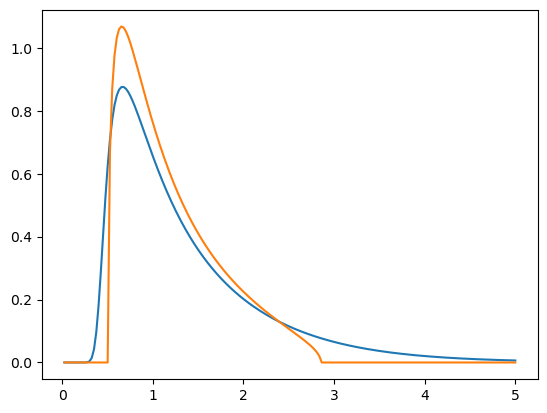

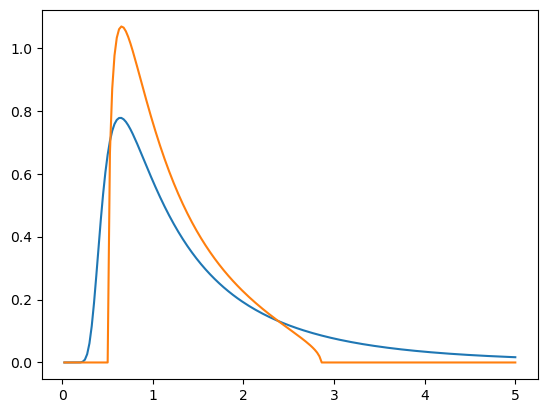

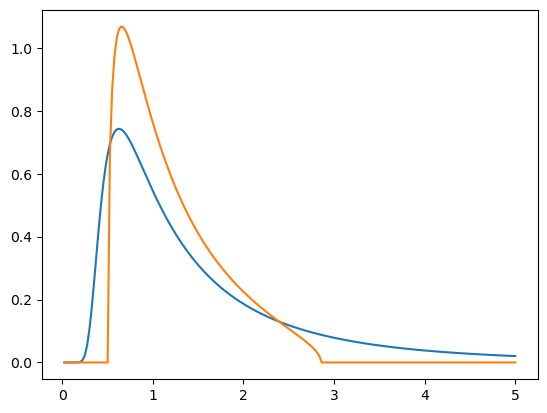

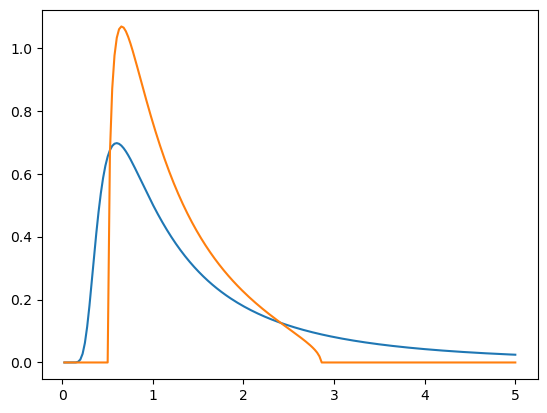

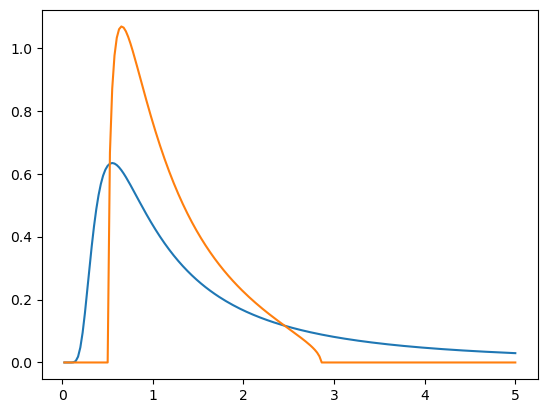

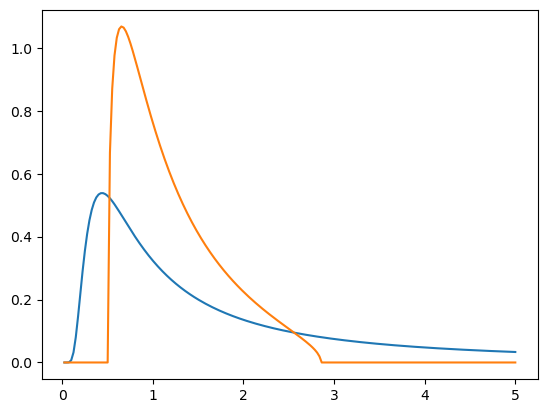

In [4]:
from htmp import *
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5,200)

gam = 6
for idx, c in enumerate([100,10,5,4,3,2,1]):
    f1 = x**(-2)*htmp.pdf(1/x, gam, c)
    marchenko_pastur = marchenko_pastur_gen(gam)
    f2 = x**(-2)*marchenko_pastur.pdf(1/x)
    plt.plot(x, f1, x, f2)
    plt.show()

In [ ]:
from htmp import *
params = htmp.fit(data, floc=0)